In [1]:
pip install dmba

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #if your dependent variable is binary
from sklearn.tree import DecisionTreeRegressor # if your dependent variable is numerical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Colab environment detected.


In [3]:
german_df = pd.read_csv('GermanCredit.csv')
german_df.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [4]:
print(german_df.shape)

(1000, 31)


In [5]:
german_df.dtypes

,0
CHK_ACCT,int64
DURATION,int64
HISTORY,int64
NEW_CAR,int64
USED_CAR,int64
FURNITURE,int64
RADIO/TV,int64
EDUCATION,int64
RETRAINING,int64
AMOUNT,int64


In [6]:
german_df.isnull().any().any()

np.False_

In [7]:
pd.set_option("display.max_rows", None)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
y = german_df['RESPONSE']

X = german_df.drop(columns=['RESPONSE'])

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(german_df.drop(columns=['RESPONSE']), german_df['RESPONSE'])

DecisionTreeClassifier(random_state=0)

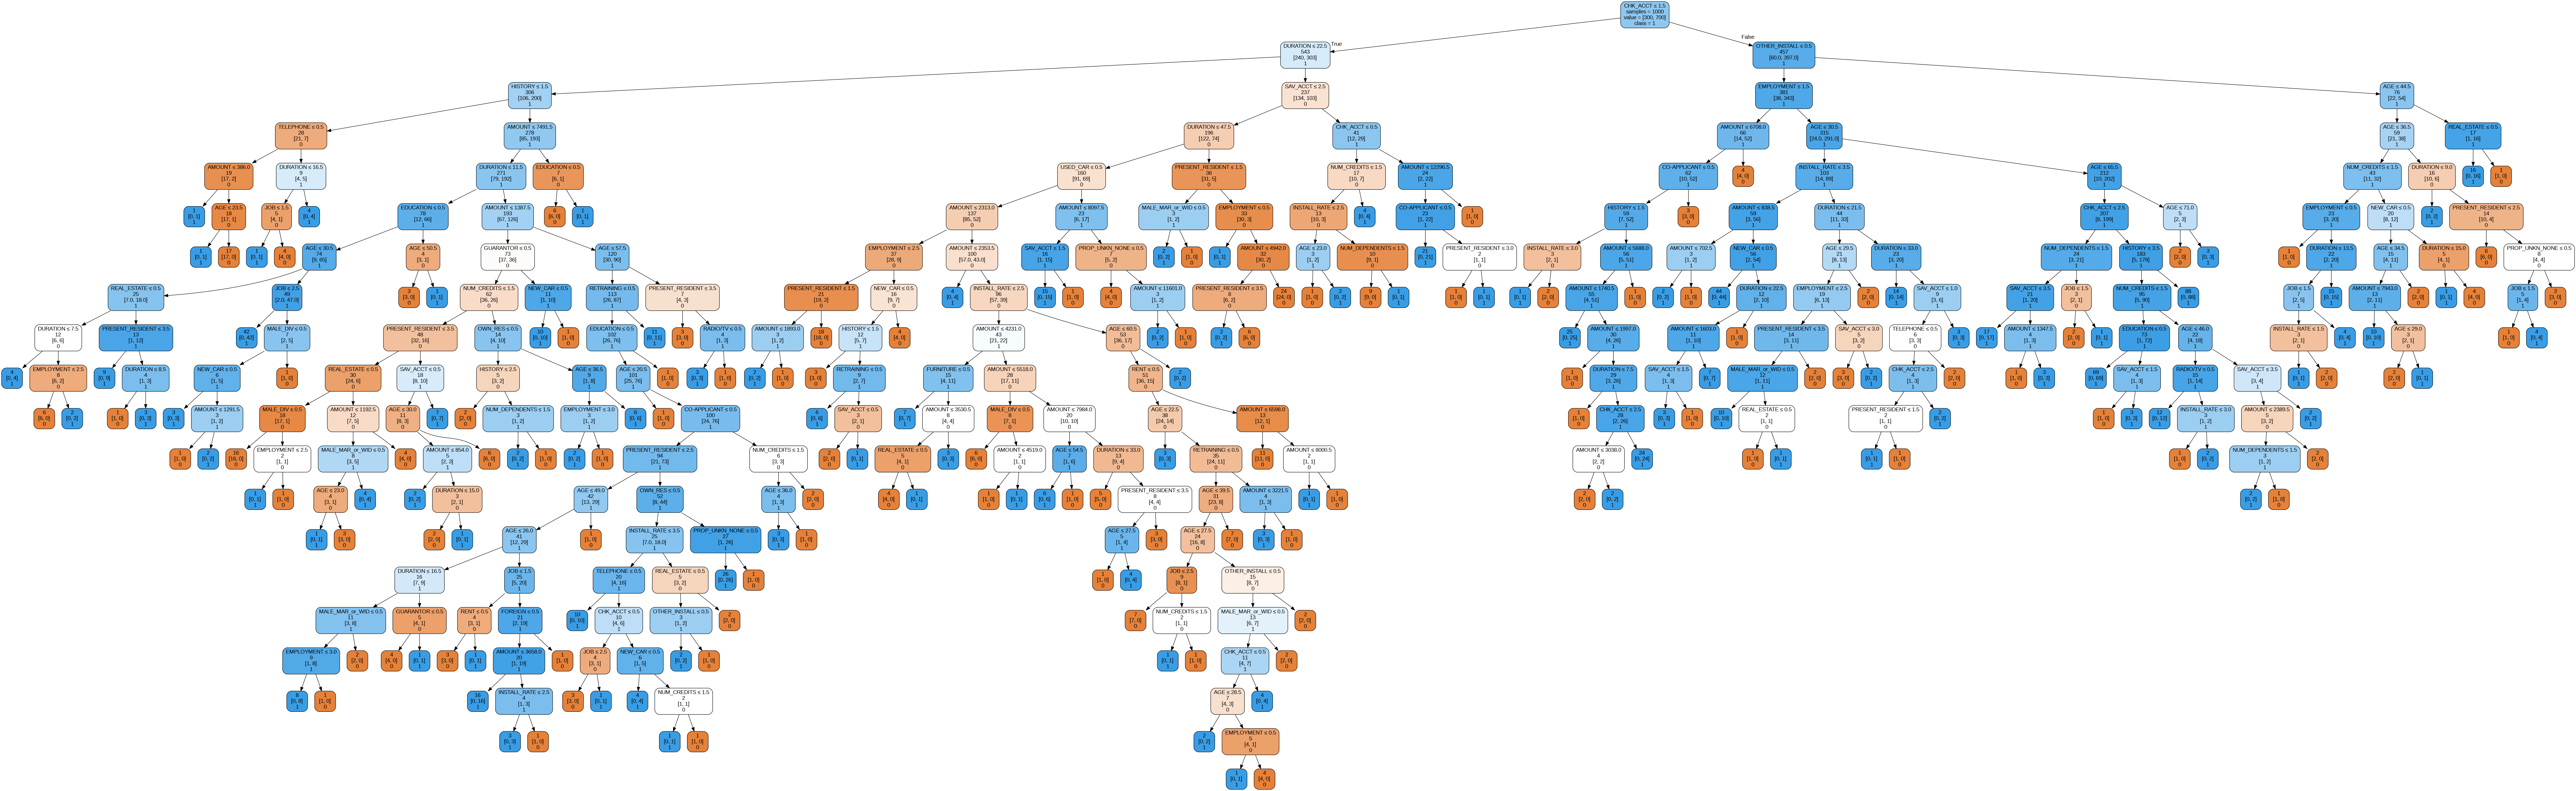

In [11]:
plotDecisionTree(classTree, feature_names=german_df.columns[:30], class_names=classTree.classes_)

In [12]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=10)
classTree.fit(german_df.drop(columns=['RESPONSE']), german_df['RESPONSE'])

DecisionTreeClassifier(max_depth=10, random_state=0)

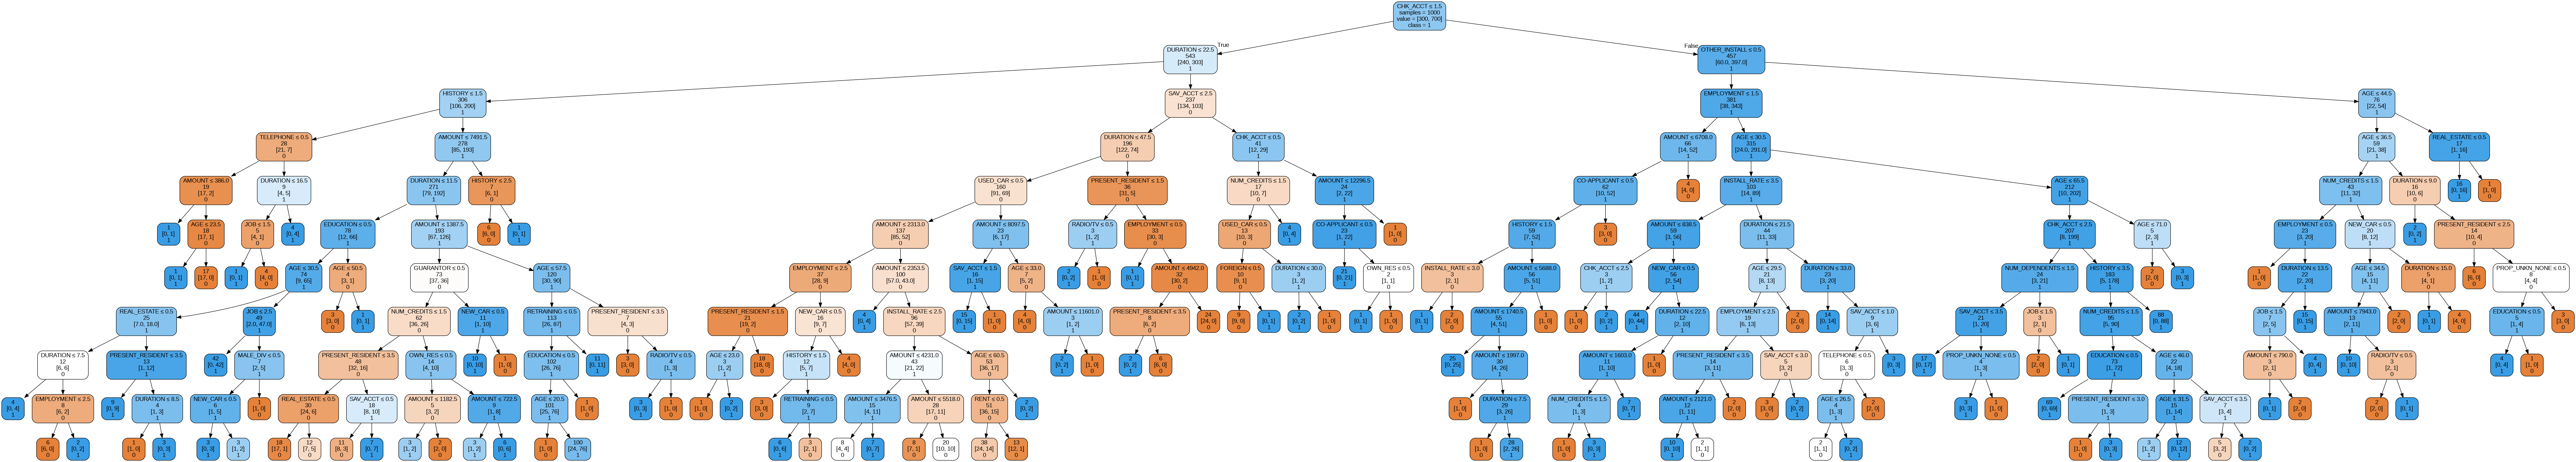

In [13]:
plotDecisionTree(classTree, feature_names=german_df.columns[:30], class_names=classTree.classes_)

In [14]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier()

In [15]:
classificationSummary(train_y, fullClassTree.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 241   0
     1   0 559


In [16]:
classificationSummary(test_y, fullClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.6900)

       Prediction
Actual   0   1
     0  31  28
     1  34 107


In [17]:
smallClassTree = DecisionTreeClassifier(max_depth=10)
smallClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10)

In [18]:
classificationSummary(train_y, smallClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.9075)

       Prediction
Actual   0   1
     0 189  52
     1  22 537


In [19]:
classificationSummary(test_y, smallClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.6900)

       Prediction
Actual   0   1
     0  26  33
     1  29 112


In [20]:
regressionSummary(train_y, smallClassTree.predict(train_X))
regressionSummary(test_y, smallClassTree.predict(test_X))


Regression statistics

               Mean Error (ME) : -0.0375
Root Mean Squared Error (RMSE) : 0.3041
     Mean Absolute Error (MAE) : 0.0925

Regression statistics

               Mean Error (ME) : -0.0200
Root Mean Squared Error (RMSE) : 0.5568
     Mean Absolute Error (MAE) : 0.3100


In [21]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 241   0
     1   0 559


In [23]:
classificationSummary(test_y, rf.predict(test_X))

Confusion Matrix (Accuracy 0.7650)

       Prediction
Actual   0   1
     0  24  35
     1  12 129


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary

In [25]:
pd.set_option("display.max_rows", None)

In [26]:
german_df.columns = [c.replace(' ', '_') for c in german_df.columns]
german_df.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [27]:
y = german_df['RESPONSE']
X = german_df.drop(columns=['RESPONSE'])

In [28]:
logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.025340001283153613
       CHK_ACCT  DURATION   HISTORY   NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  \
coeff  0.579842 -0.020682  0.549383 -0.345769  0.286674   0.034597  0.214765   

       EDUCATION  RETRAINING    AMOUNT  ...  PROP_UNKN_NONE       AGE  \
coeff  -0.068305   -0.076126 -0.000143  ...       -0.115346  0.007959   

       OTHER_INSTALL      RENT   OWN_RES  NUM_CREDITS       JOB  \
coeff        -0.2024 -0.121701  0.179316    -0.088539  0.056392   

       NUM_DEPENDENTS  TELEPHONE   FOREIGN  
coeff        -0.04995   0.164861  0.083404  

[1 rows x 30 columns]


In [30]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.7750)

       Prediction
Actual   0   1
     0 124 117
     1  63 496


In [31]:
classificationSummary(test_y, logit_reg.predict(test_X))

Confusion Matrix (Accuracy 0.7650)

       Prediction
Actual   0   1
     0  27  32
     1  15 126
